In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install --upgrade --force-reinstall git+https://github.com/FelipeSchreiber/BregmanClustering.git --no-deps
!pip install torch_geometric rpy2==3.5.1
import os
import pickle
from sys import platform
import BregmanTests
os.chmod(BregmanTests.__path__[0]+"/install_algos.sh",777)
if platform == "win32":
    os.environ["R_HOME"] = r"C:\\Program Files\R\R-4.2.3"
else:
    ### Uncomment line below if in Google Colab environment
    print(os.path.isfile(BregmanTests.__path__[0]+"/install_algos.sh"))
    ### Done

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/FelipeSchreiber/BregmanClustering.git to /tmp/pip-req-build-sqc30g1o
  Running command git clone --filter=blob:none --quiet https://github.com/FelipeSchreiber/BregmanClustering.git /tmp/pip-req-build-sqc30g1o
  Resolved https://github.com/FelipeSchreiber/BregmanClustering.git to commit 72401cb6ac34b31a604baeda3c3797395343c0f8
  Preparing metadata (setup.py) ... done
  Created wheel for bregClust: filename=bregClust-1.0-py3-none-any.whl size=38465 sha256=b9e797288f68ba759fcdd0f280ed169ef28876d06aefd664341f0575ac9fb2bb
  Stored in directory: /tmp/pip-ephem-wheel-cache-ygx788pj/wheels/3f/90/fb/833529540c1d5f19c385fde761cc07c664c4b9a5edf7c6735b
Successfully built bregClust
  Attempting uninstall: bregClust
    Found existing installation: bregClust 1.0
    Uninstalling bregClust-1.0:
      Successfully uninstalled bregClust-1.0
Looking in indexes: https://pypi.org

In [3]:
from BregmanTests.benchmark import *
n_average = 20
n = 600
n_clusters = 3
d = 1
sizes = [ n // n_clusters ]*np.ones( n_clusters, dtype = int )

## Test 2_1

### Run numpy model

In [4]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
a_range = np.linspace(5,14,3)
r_range = np.linspace(0,0.7,3)*np.log(n)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False,
                    initializer = 'AIC')\
                  .run_2_1(n_average=1,
                            cluster_sizes=sizes,
                            b=5,
                            a_range= a_range,
                            r_range = r_range,
                            dense=False,
                            binary=True,
                           strategy = 3)
with open('test_2_1.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_1.pickle" "/content/drive/MyDrive"

0it [00:00, ?it/s]


SBM:  [[0.05330775 0.         0.05330775]
 [0.05330775 0.05330775 0.05330775]
 [0.05330775 0.05330775 0.05330775]]

Distribution Centers:  [[0.0, 0.0], [-0.0, 0.0], [-0.0, -0.0]]


1it [01:05, 65.04s/it]


attribute_means:  [[ 0.07574618 -0.02275632]
 [-0.0047732  -0.02857338]
 [-0.04836154 -0.06642672]] 
edge_means:  [[0.052    0.       0.05245 ]
 [0.050925 0.052425 0.052   ]
 [0.0528   0.0512   0.05175 ]] 
weight_means:  [[[ 1.]
  [nan]
  [ 1.]]

 [[ 1.]
  [ 1.]
  [ 1.]]

 [[ 1.]
  [ 1.]
  [ 1.]]]

SBM:  [[0.05330775 0.         0.05330775]
 [0.05330775 0.05330775 0.05330775]
 [0.05330775 0.05330775 0.05330775]]

Distribution Centers:  [[2.238925379325651, 0.0], [-1.119462689662825, 1.9389662556737244], [-1.1194626896628264, -1.9389662556737237]]


2it [01:54, 55.68s/it]


attribute_means:  [[-1.05740981  1.9173948 ]
 [-1.07190787 -1.89898556]
 [ 2.35822534 -0.03997891]] 
edge_means:  [[0.052425 0.052    0.050925]
 [0.0512   0.05175  0.0528  ]
 [0.       0.05245  0.052   ]] 
weight_means:  [[[ 1.]
  [ 1.]
  [ 1.]]

 [[ 1.]
  [ 1.]
  [ 1.]]

 [[nan]
  [ 1.]
  [ 1.]]]

SBM:  [[0.05330775 0.         0.05330775]
 [0.05330775 0.05330775 0.05330775]
 [0.05330775 0.05330775 0.05330775]]

Distribution Centers:  [[4.477850758651302, 0.0], [-2.23892537932565, 3.8779325113474488], [-2.2389253793256527, -3.8779325113474474]]


3it [02:42, 52.43s/it]


attribute_means:  [[-2.17167076 -4.01479343]
 [-2.21084483  3.96127152]
 [ 4.42645864 -0.04746822]] 
edge_means:  [[0.05175  0.0512   0.0528  ]
 [0.052    0.052425 0.050925]
 [0.05245  0.       0.052   ]] 
weight_means:  [[[ 1.]
  [ 1.]
  [ 1.]]

 [[ 1.]
  [ 1.]
  [ 1.]]

 [[ 1.]
  [nan]
  [ 1.]]]

SBM:  [[0.10128472 0.         0.05330775]
 [0.05330775 0.10128472 0.05330775]
 [0.05330775 0.05330775 0.10128472]]

Distribution Centers:  [[0.0, 0.0], [-0.0, 0.0], [-0.0, -0.0]]


4it [03:41, 54.82s/it]


attribute_means:  [[-0.05583368  0.06455935]
 [-0.06116432  0.07404933]
 [ 0.14571947  0.21428411]] 
edge_means:  [[0.1022   0.052    0.050925]
 [0.0512   0.10045  0.0528  ]
 [0.       0.05245  0.099775]] 
weight_means:  [[[ 1.]
  [ 1.]
  [ 1.]]

 [[ 1.]
  [ 1.]
  [ 1.]]

 [[nan]
  [ 1.]
  [ 1.]]]

SBM:  [[0.10128472 0.         0.05330775]
 [0.05330775 0.10128472 0.05330775]
 [0.05330775 0.05330775 0.10128472]]

Distribution Centers:  [[2.238925379325651, 0.0], [-1.119462689662825, 1.9389662556737244], [-1.1194626896628264, -1.9389662556737237]]


5it [04:38, 55.73s/it]


attribute_means:  [[-1.17258453 -1.83964941]
 [-1.06948907  1.95817266]
 [ 2.21871558  0.0058911 ]] 
edge_means:  [[0.10045  0.0512   0.0528  ]
 [0.052    0.1022   0.050925]
 [0.05245  0.       0.099775]] 
weight_means:  [[[ 1.]
  [ 1.]
  [ 1.]]

 [[ 1.]
  [ 1.]
  [ 1.]]

 [[ 1.]
  [nan]
  [ 1.]]]

SBM:  [[0.10128472 0.         0.05330775]
 [0.05330775 0.10128472 0.05330775]
 [0.05330775 0.05330775 0.10128472]]

Distribution Centers:  [[4.477850758651302, 0.0], [-2.23892537932565, 3.8779325113474488], [-2.2389253793256527, -3.8779325113474474]]


6it [05:34, 55.90s/it]


attribute_means:  [[-2.19182808 -3.77305853]
 [ 4.42827517 -0.06328314]
 [-2.28103533  3.83887338]] 
edge_means:  [[0.10045  0.0528   0.0512  ]
 [0.05245  0.099775 0.      ]
 [0.052    0.050925 0.1022  ]] 
weight_means:  [[[ 1.]
  [ 1.]
  [ 1.]]

 [[ 1.]
  [ 1.]
  [nan]]

 [[ 1.]
  [ 1.]
  [ 1.]]]

SBM:  [[0.14926169 0.         0.05330775]
 [0.05330775 0.14926169 0.05330775]
 [0.05330775 0.05330775 0.14926169]]

Distribution Centers:  [[0.0, 0.0], [-0.0, 0.0], [-0.0, -0.0]]


7it [06:39, 58.67s/it]


attribute_means:  [[-0.00917801  0.02981888]
 [ 0.00093892  0.07158328]
 [-0.03246065  0.09599861]] 
edge_means:  [[0.148825 0.0528   0.0512  ]
 [0.05245  0.148175 0.      ]
 [0.052    0.050925 0.1521  ]] 
weight_means:  [[[ 1.]
  [ 1.]
  [ 1.]]

 [[ 1.]
  [ 1.]
  [nan]]

 [[ 1.]
  [ 1.]
  [ 1.]]]

SBM:  [[0.14926169 0.         0.05330775]
 [0.05330775 0.14926169 0.05330775]
 [0.05330775 0.05330775 0.14926169]]

Distribution Centers:  [[2.238925379325651, 0.0], [-1.119462689662825, 1.9389662556737244], [-1.1194626896628264, -1.9389662556737237]]


8it [07:43, 60.49s/it]


attribute_means:  [[-1.17362887e+00  1.86191004e+00]
 [ 2.29688500e+00  7.46849656e-04]
 [-1.10732612e+00 -1.97935949e+00]] 
edge_means:  [[0.1521   0.050925 0.052   ]
 [0.       0.148175 0.05245 ]
 [0.0512   0.0528   0.148825]] 
weight_means:  [[[ 1.]
  [ 1.]
  [ 1.]]

 [[nan]
  [ 1.]
  [ 1.]]

 [[ 1.]
  [ 1.]
  [ 1.]]]

SBM:  [[0.14926169 0.         0.05330775]
 [0.05330775 0.14926169 0.05330775]
 [0.05330775 0.05330775 0.14926169]]

Distribution Centers:  [[4.477850758651302, 0.0], [-2.23892537932565, 3.8779325113474488], [-2.2389253793256527, -3.8779325113474474]]


9it [08:47, 58.56s/it]


attribute_means:  [[ 4.53537978 -0.04644999]
 [-2.34794024 -3.91733207]
 [-2.09414659  3.92244397]] 
edge_means:  [[0.148175 0.05245  0.      ]
 [0.0528   0.148825 0.0512  ]
 [0.050925 0.052    0.1521  ]] 
weight_means:  [[[ 1.]
  [ 1.]
  [nan]]

 [[ 1.]
  [ 1.]
  [ 1.]]

 [[ 1.]
  [ 1.]
  [ 1.]]]


### Run torch model

In [ ]:
attributes_distribution = "gaussian"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
a_range = np.linspace(5,14,3)
r_range = np.linspace(0,0.7,3)*np.log(n)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=True,
                    initializer = 'chernoff')\
                  .run_2_1(n_average=1,
                            cluster_sizes=sizes,
                            b=5,
                            a_range= a_range,
                            r_range = r_range,
                            dense=False,
                            binary=True)
with open('test_2_1.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_1.pickle" "/content/drive/MyDrive"

## Test 2_2

In [ ]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
d_range = np.arange(1,6)
mu_range = np.linspace(0,6,20)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_torch=False
                  )\
                  .run_2_2(n_average=10,
                            cluster_sizes=sizes,
                             d_range = d_range,
                             mu_range = mu_range,
                             dense=True,
                             binary=False)
with open('test_2_2.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_2.pickle" "/content/drive/MyDrive"

## Test 2_3

In [ ]:
attributes_distribution = "poisson"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
d_range = np.arange(1,5)
a_range = np.linspace(5,14,10)
lambda_range = np.arange(1,6)
att_centers = np.arange(1,4).reshape(-1,1)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    att_centers=att_centers,
                    run_torch=False
                 )\
                  .run_2_3(n_average=10,
                            cluster_sizes=sizes,
                            d_range= d_range,
                            lambda_range = lambda_range,
                            a_range = a_range,
                            b = 5,
                            dense=False,
                            binary=False)
with open('test_2_3.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_3.pickle" "/content/drive/MyDrive"

## Test 2_4

In [ ]:
attributes_distribution = "exponential"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
att_averages = np.linspace(1,5,10)
w_averages = np.linspace(1,5,10)
stats = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False
                 )\
                  .run_2_4(n_average=10,
                            cluster_sizes=sizes,
                            b = 5,
                            w_averages=w_averages,
                            att_averages=att_averages)
with open('test_2_4.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_4.pickle" "/content/drive/MyDrive"

## Test 2_5

In [ ]:
attributes_distribution = "exponential"
edge_distribution = "bernoulli"
weight_distribution = "exponential"
att_averages = np.linspace(1,5,5)
w_averages = np.array([1,3,6,9,12])
stats = BregmanBenchmark(att_variance=n_average,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False
                 )\
                  .run_2_5(n_average=n_average,
                            cluster_sizes=sizes,
                            b = 5,
                            w_averages=w_averages,
                            att_averages=att_averages)
with open('test_2_5.pickle', 'wb') as handle:
    pickle.dump(stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
!cp "/content/test_2_5.pickle" "/content/drive/MyDrive"

In [ ]:
test_2_5=None
with open("/content/drive/MyDrive/test_2_5.pickle", 'rb') as handle:
    test_2_5 = pickle.load(handle)
test_2_5.keys()
df = pd.DataFrame.from_dict(test_2_5)
# labels = [ 'EM-GMM', 'SC', 'Algo1', 'attSBM','IR_sLS']
# algos = ["attributes", "graph", "ours", "attSBM", "IR_sLS"]
# saveFig = True
# for varying in ["graph","attributes"]:
#   curves = []
#   curves_std = []
#   for algo in algos:
#     curves.append(df.loc[(df['varying'] == varying) & (df['algorithm'] == algo)]["ARI"])
#     curves_std.append(df.loc[(df['varying'] == varying) & (df['algorithm'] == algo)]["ARI_std"])
#   if varying == 'graph':
#     x = df.loc[(df['varying'] == "graph")]["weights_avg"].unique()    
#     fileName = 'N_' + str(n) + '_K_' + str(n_clusters) + '_att_' + str(2)  +  '_nAverage' + str(n_average) + '.jpeg'
#     plotting( x, curves, labels, curves_std = curves_std, xticks = x, xlabel = 'weights_avg', saveFig = True, fileName = fileName )
#     plt.close()
#   elif varying == 'attributes':
#     x = df.loc[(df['varying'] == "attributes")]["attributes_avg"].unique()
#     fileName = 'N_' + str(n) + '_K_' + str(n_clusters) + '_w_' + str(2) + '_nAverage_' + str(n_average) + '.jpeg'
#     plotting( x , curves, labels, curves_std = curves_std, xticks = x, xlabel = 'attributes_avg', saveFig = True, fileName = fileName )
#     plt.close()

## Test Real Data

In [9]:
attributes_distribution = "bernoulli"
edge_distribution = "bernoulli"
weight_distribution = "gaussian"
scores = BregmanBenchmark(att_variance=1,
                    attributes_distribution=attributes_distribution,
                    weight_variance=1,
                    weight_distribution=weight_distribution,
                    edge_distribution=edge_distribution,
                    run_torch=False)\
                  .run_real_data(strategy=2)
scores


CURRENT DATASET:  Cornell
INPUTS:  (183, 183) (183, 183, 1) torch.Size([183, 1703])

CURRENT DATASET:  Texas
INPUTS:  (183, 183) (183, 183, 1) torch.Size([183, 1703])

CURRENT DATASET:  Wisconsin
INPUTS:  (251, 251) (251, 251, 1) torch.Size([251, 1703])

CURRENT DATASET:  Cora
INPUTS:  (2708, 2708) (2708, 2708, 1) torch.Size([2708, 1433])

CURRENT DATASET:  CiteSeer
INPUTS:  (3327, 3327) (3327, 3327, 1) torch.Size([3327, 3703])


{'dataset': ['Cornell', 'Texas', 'Wisconsin', 'Cora', 'CiteSeer'],
 'ARI': [0.03939352761342101,
  0.010729257144094815,
  0.02099802199154118,
  0.017692041355841813,
  0.022351217692019844]}

In [ ]:
"""
Using strategy 3:
{'dataset': ['Cornell', 'Texas', 'Wisconsin', 'Cora', 'CiteSeer'],
 'ARI': [0.021333077187108966,
  0.02158094558247706,
  0.06561886114111304,
  0.09454483715306834,
  0.021826025060071436]}

Using strategy 2:
{'dataset': ['Cornell', 'Texas', 'Wisconsin', 'Cora', 'CiteSeer'],
 'ARI': [0.03939352761342101,
  0.010729257144094815,
  0.02099802199154118,
  0.017692041355841813,
  0.022351217692019844]}
"""


In [ ]:
# attributes_distribution = "gaussian"
# edge_distribution = "bernoulli"
# weight_distribution = "exponential"
# BregmanBenchmark(att_variance=1,
#                     attributes_distribution=attributes_distribution,
#                     weight_variance=1,
#                     weight_distribution=weight_distribution,
#                     edge_distribution=edge_distribution,
#                     run_torch=False)\
#                  .run_test(n_average=n_average,cluster_sizes=sizes,\
#                  b=5,\
#                  a_range=[ 5,7,9,11,13,15 ],\
#                  r_range = [ 0,1,2,3,4,5 ],\
#                  dense=False,\
#                  binary=True,\
#                  file_endings=".jpeg",\
#                  n_iters=25)

# Begin Plots

In [5]:
from BregmanTests.utils import *

In [6]:
test_2_1=None
with open("/content/drive/MyDrive/test_2_1.pickle", 'rb') as handle:
    test_2_1 = pickle.load(handle)
test_2_1.keys()

dict_keys(['a', 'r', 'ARI'])

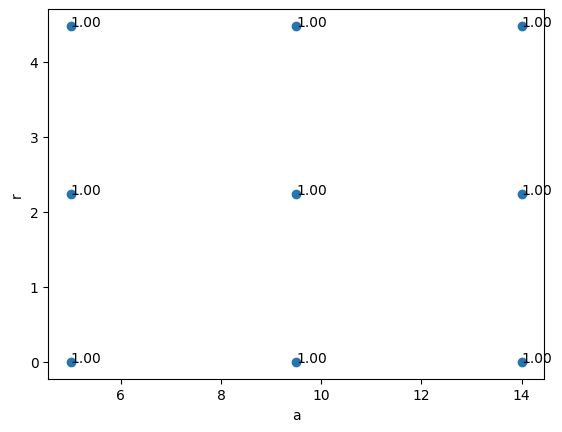

In [7]:
def scatter_(dict_,x_name,y_name,z_name):
  fig, ax = plt.subplots()
  x,y = dict_[x_name],dict_[y_name]
  ax.scatter(x,y)
  for i, txt in enumerate(dict_[z_name]):
      ax.annotate("{:.2f}".format(txt), (x[i], y[i]))
  ax.set_xlabel(x_name)
  ax.set_ylabel(y_name)
scatter_(test_2_1,'a', 'r', 'ARI')

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
x,y,z = test_2_1["a"],test_2_1["r"],test_2_1["ARI"]
xlabel="a"
ylabel="r"
ticks = np.linspace(0, 1, 5, endpoint=True)
C = ax.scatter(x=x,y=y,c=z,cmap="coolwarm")
cb = fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI',ticks=ticks)
cb.set_label(label='ARI', size=SIZE_LEGEND)
cb.ax.tick_params(labelsize=SIZE_TICKS)
plt.xlabel( xlabel, fontsize = SIZE_LABELS )
plt.ylabel( ylabel, fontsize = SIZE_LABELS )
plt.xticks( fontsize = SIZE_TICKS )
plt.yticks( fontsize = SIZE_TICKS )
plt.show()

In [ ]:
test_2_4=None
SIZE_TITLE = 24
SIZE_LABELS = 24
SIZE_TICKS = 18
SIZE_LEGEND = 18
with open("/content/drive/MyDrive/test_2_4.pickle", 'rb') as handle:
    test_2_4 = pickle.load(handle)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
x,y,z = np.array(test_2_4["lambda_att"]),np.array(test_2_4["lambda_w"]),np.array(test_2_4["ARI"])
xlabel="attributes_avg"
ylabel="weights_avg"
C = ax.scatter(x=1/x,y=1/y,c=z,cmap="coolwarm")
plt.ylim(0.9,3.5)
ticks = np.linspace(z.min(), z.max(), 5, endpoint=True)
cb = fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI',ticks=ticks)
cb.set_label(label='ARI', size=SIZE_LEGEND)
cb.ax.tick_params(labelsize=SIZE_TICKS)
plt.xlabel( xlabel, fontsize = SIZE_LABELS )
plt.ylabel( ylabel, fontsize = SIZE_LABELS )
plt.xticks( fontsize = SIZE_TICKS )
plt.yticks( fontsize = SIZE_TICKS )
plt.show()

In [ ]:
x,y,z = test_2_1["a"],test_2_1["r"],test_2_1["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0]).T
make_contour_plot(vals_x,vals_y,z,x_label="a",y_label="r",filename="contour_plot_2_1.jpeg")

In [ ]:
test_2_2=None
with open("/content/drive/MyDrive/test_2_2.pickle", 'rb') as handle:
    test_2_2 = pickle.load(handle)
test_2_2.keys()

In [ ]:
scatter_(test_2_2,'d', 'mu', 'ARI')

In [ ]:
x,y,z = test_2_2["d"],test_2_2["mu"],test_2_2["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
"""
len(X) == N is the number of columns in Z and len(Y) == M is the number of rows in Z.
Z = M x N
"""
x = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0])
y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0])
# x,y = np.meshgrid(vals_x,vals_y)
z = np.array(z).reshape(len(vals_x),len(vals_y)).T
make_contour_plot(vals_x,vals_y,z,x_label="d",y_label="mu",filename="contour_plot_2_2.jpeg")

In [ ]:
test_2_3=None
with open("/content/drive/MyDrive/test_2_3.pickle", 'rb') as handle:
    test_2_3 = pickle.load(handle)
test_2_3.keys()

In [ ]:
x,y,z,data = test_2_3["d"],test_2_3["lambda"], test_2_3["a"],test_2_3["ARI"]
vals_x = np.unique(x)
vals_y = np.unique(y)
vals_z = np.unique(z)
"""
len(X) == N is the number of columns in data,
len(Y) == M is the number of rows in data.
len(Z) == P is the depth of data
DATA = M x N X P
"""
X = np.array(x).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Y = np.array(y).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
Z = np.array(z).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
data = np.array(data).reshape(vals_x.shape[0],vals_y.shape[0],vals_z.shape[0])
x_label="d"
y_label="lambda"
z_label = "a"

kw = {
        # 'vmin': data.min(),
        # 'vmax': data.max()
    }

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot contour surfaces
    ### This is the X x Y plane for z=zmax 
_ = ax.contourf(
            X[:, :, -1], Y[:, :, -1], data[:, :, -1],
            zdir='z', offset=zmax, **kw
        )
    
    ### This is the X x Y plane for z=zmin 
_ = ax.contourf(
            X[:, :, 0], Y[:, :, 0], data[:, :, 0],
            zdir='z', offset=zmin, **kw
        )

    ### This is the X x Z plane for y=ymax 
_ = ax.contourf(
            X[-1, :, :], data[-1, :, :], Z[-1, :, :],
            zdir='y', offset=ymax, **kw
        )

    ### This is the X x Z plane for y=ymin 
_ = ax.contourf(
            X[0, :, :], data[0, :, :], Z[0, :, :],
            zdir='y', offset=ymin, **kw
        )

    ### This is the Y x Z plane for x=xmax 
_ = ax.contourf(
            data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
            zdir='x', offset=xmax, **kw
        )

    ### This is the Y x Z plane for x=xmin
C = ax.contourf(
            data[:, 0, :], Y[:, 0, :], Z[:, 0, :],
            zdir='x', offset=xmin, **kw
        )


# Plot edges
edges_kw = dict(color='0.4', linewidth=1,zorder=-1e3)
ax.plot([xmax, xmax], [ymin, ymax], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], zmin, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
        xlabel=x_label,
        ylabel=y_label,
        zlabel=z_label
    )

# Set zoom and angle view
ax.view_init(30, 45, 0)
ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='ARI')

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')
ax.set(
        xlabel=x_label,
        ylabel=y_label,
        zlabel=z_label
    )
C = ax.scatter(xs=X,ys=Y,zs=Z,c=data)
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.2, label='ARI')
plt.show()